In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ------- -------------------------------- 2.4/13.3 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 5.8/13.3 MB 14.1 MB/s eta 0:00:01
   --------------------------- ------------ 9.2/13.3 MB 15.0 MB/s eta 0:00:01
   -------------------------------------- - 12.8/13.3 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 14.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 13.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
from prophet import Prophet

In [4]:
df = pd.read_csv("train.csv")
df['Month'] = pd.to_datetime(df['Month'], format='%d-%m-%Y')
df = df.rename(columns={'Month': 'ds', 'Avg_sunspot_count': 'y'})

In [5]:
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(df)

11:49:41 - cmdstanpy - INFO - Chain [1] start processing
11:49:42 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=120, freq='MS')  # 120 months = 10 years
forecast = model.predict(future)

In [10]:
forecast_2011_2020 = forecast[(forecast['ds'] >= '2011-01-01') & (forecast['ds'] <= '2020-12-01')]
print(forecast_2011_2020[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds        yhat  yhat_lower  yhat_upper
3155 2011-01-01   76.164945   -7.255747  161.908612
3156 2011-02-01  228.762562  145.744517  314.175096
3157 2011-03-01   27.379991  -60.351551  109.407501
3158 2011-04-01   49.324265  -31.934251  133.673451
3159 2011-05-01   83.460140   -1.201098  169.450750
...         ...         ...         ...         ...
3259 2019-09-01   83.009346    1.476321  166.543459
3260 2019-10-01   53.888108  -27.375687  139.759279
3261 2019-11-01   36.208530  -58.243373  126.525964
3262 2019-12-01   77.737540   -7.857273  163.492399
3263 2020-01-01   71.319508  -16.732643  163.644604

[109 rows x 4 columns]


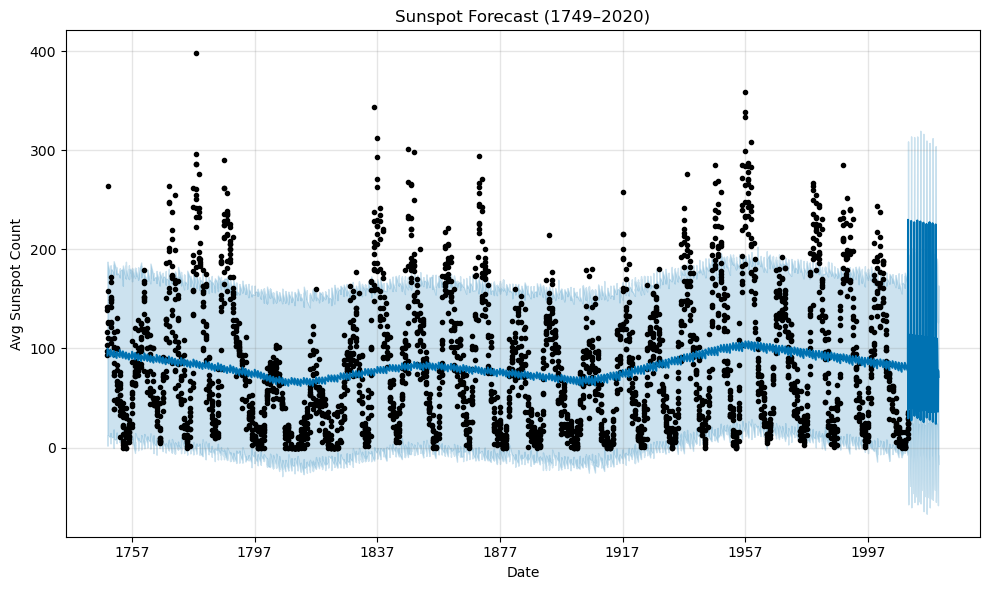

In [11]:
fig1 = model.plot(forecast)
plt.title("Sunspot Forecast (1749–2020)")
plt.xlabel("Date")
plt.ylabel("Avg Sunspot Count")
plt.tight_layout()
plt.show()